In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('C:/Users/HP/Desktop/EstateVerse-Base-Model/backend/data/preprocessed_data.csv')
df.head(3)

,active,bathroom,deposit,floor,furnishingDesc,isMaintenance,loanAvailable,locality,location,parking,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,True,3,90000,3,Semi,True,True,Gachibowli,"(17.465080245131944, 78.34013432209017)",BOTH,...,False,True,False,False,False,True,False,False,True,True
1,True,2,45000,2,Unfurnished,False,True,Chandrayangutta,"(17.320233889090165, 78.46776588035664)",TWO_WHEELER,...,False,False,False,False,False,False,True,False,False,False
2,True,3,80000,0,Semi,True,True,Manikonda,"(17.4036491, 78.37944209999999)",BOTH,...,True,True,False,False,False,True,False,False,True,True


In [3]:
categorical_columns = df.columns[df.nunique() < 10].tolist()
print(categorical_columns)

['active', 'furnishingDesc', 'isMaintenance', 'loanAvailable', 'parking', 'propertyType', 'sharedAccomodation', 'swimmingPool', 'type_bhk', 'LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP']


In [4]:
df = pd.get_dummies(df, columns=categorical_columns)

In [5]:
df = pd.get_dummies(df, columns=['locality'])
df[['latitude', 'longitude']] = df['location'].str.strip('()').str.split(',', expand=True).astype(float)
df = df.drop('location', axis=1)

In [6]:
df.head(2)

,bathroom,deposit,floor,property_age,property_size,rent_amount,totalFloor,active_True,furnishingDesc_Full,furnishingDesc_Semi,...,locality_west hanuman nagar Boduppal,locality_whisper valley,locality_yellammabanda.com,"locality_yousuf manzil, Kachiguda Kamela",locality_yousufguda,locality_yousufguda,locality_zamistanpur,locality_zzathnagar,latitude,longitude
0,3,90000,3,5,2200,28000,5,True,False,True,...,False,False,False,False,False,False,False,False,17.465080,78.340134
1,2,45000,2,1,1200,15000,2,True,False,False,...,False,False,False,False,False,False,False,False,17.320234,78.467766


In [8]:
X = df.drop(['deposit', 'rent_amount'], axis=1)  # Features excluding 'deposit' and 'rent_amount'
y = df[['deposit', 'rent_amount']]  # Target variables

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Columns: 2704 entries, bathroom to longitude
dtypes: bool(2697), float64(2), int64(5)
memory usage: 50.2 MB


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   deposit      19110 non-null  int64
 1   rent_amount  19110 non-null  int64
dtypes: int64(2)
memory usage: 298.7 KB


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [12]:
X_test.head(2)

,bathroom,floor,property_age,property_size,totalFloor,active_True,furnishingDesc_Full,furnishingDesc_Semi,furnishingDesc_Unfurnished,isMaintenance_False,...,locality_west hanuman nagar Boduppal,locality_whisper valley,locality_yellammabanda.com,"locality_yousuf manzil, Kachiguda Kamela",locality_yousufguda,locality_yousufguda,locality_zamistanpur,locality_zzathnagar,latitude,longitude
15013,3,0,5,1400,7,True,True,False,False,False,...,False,False,False,False,False,False,False,False,17.412045,78.565161
4614,2,1,10,1200,1,True,False,True,False,True,...,False,False,False,False,False,False,False,False,17.450821,78.524547


In [13]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
y_pred

array([[45871.914, 13818.699],
       [24905.318, 13157.738],
       [59999.62 , 26469.502],
       ...,
       [12347.737,  7959.964],
       [12289.882,  7407.328],
       [36393.05 , 16296.125]], dtype=float32)

In [15]:
mse = mean_squared_error(y_test, y_pred)
print(f'Root mean Squared Error: {mse ** 0.5}')

Root mean Squared Error: 33274.652720370475


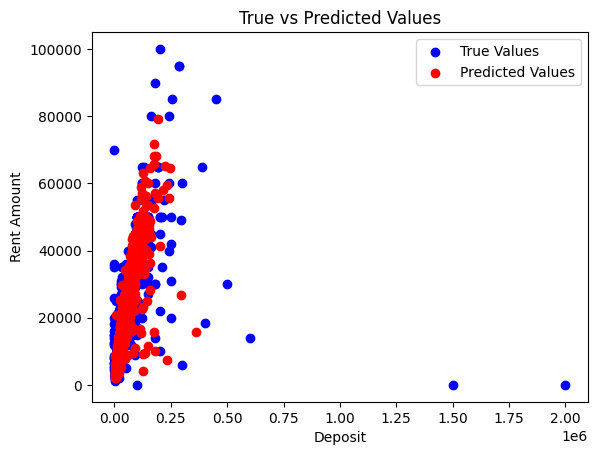

In [16]:
# scatter plot
import matplotlib.pyplot as plt
plt.scatter(y_test['deposit'], y_test['rent_amount'], color='blue', label='True Values')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color='red', label='Predicted Values')

plt.xlabel('Deposit')
plt.ylabel('Rent Amount')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

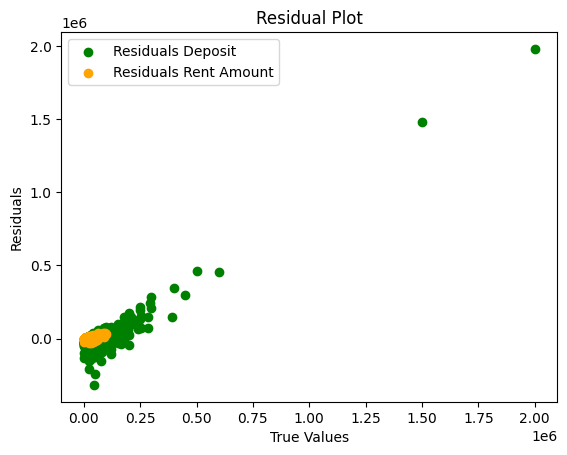

In [17]:
# residual scatter plot
residuals = y_test - y_pred
plt.scatter(y_test['deposit'], residuals['deposit'], color='green', label='Residuals Deposit')
plt.scatter(y_test['rent_amount'], residuals['rent_amount'], color='orange', label='Residuals Rent Amount')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

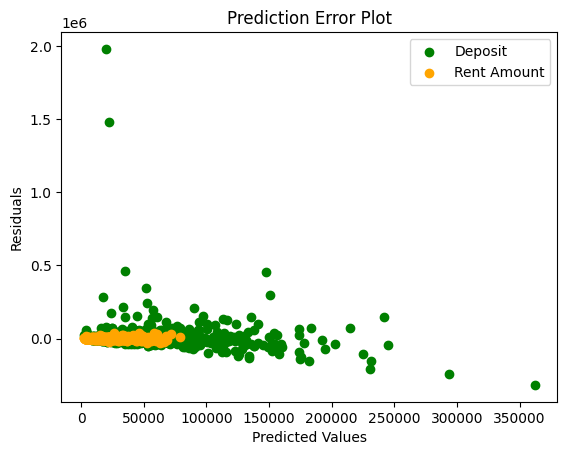

In [18]:
plt.scatter(y_pred[:, 0], residuals['deposit'], color='green', label='Deposit')
plt.scatter(y_pred[:, 1], residuals['rent_amount'], color='orange', label='Rent Amount')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Prediction Error Plot')
plt.legend()
plt.show()

In [33]:
import joblib
model_path = 'xgboost_model.pkl'
joblib.dump(model, model_path)

['xgboost_model.pkl']

In [34]:
xgb_model = joblib.load('C:/Users/HP/Desktop/EstateVerse-Base-Model/backend/app/models/xgboost_model.pkl')  

In [40]:
import pandas as pd

# Assuming df_train is your training set DataFrame with one-hot encoding
# df_train = pd.get_dummies(train_data, columns=categorical_columns)

# Assuming input_data is your new input data
input_data = {
    "active": "True", "bathroom": "3", "floor": "3", "furnishingDesc": "Semi",
    "isMaintenance": "True", "loanAvailable": "True", "locality": "Gachibowli",
    "location": "(17.465080245131944, 78.34013432209017)", "parking": "BOTH",
    "propertyType": "RENT", "property_age": "5", "property_size": "2200",
    "sharedAccomodation": "False", "swimmingPool": "False", "totalFloor": "5",
    "type_bhk": "BHK3", "LIFT": "True", "GYM": "False", "INTERNET": "False",
    "AC": "False", "CLUB": "False", "INTERCOM": "False", "POOL": "False",
    "CPA": "True", "FS": "False", "SERVANT": "False", "SECURITY": "True",
    "SC": "False", "GP": "False", "PARK": "False", "RWH": "True", "STP": "False",
    "HK": "False", "PB": "True", "VP": "True"
}

categorical_columns = ['active', 'furnishingDesc', 'isMaintenance', 'loanAvailable', 'parking', 'propertyType', 'sharedAccomodation', 'swimmingPool', 'type_bhk', 'LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP']
numeric_columns = ['bathroom', 'floor', 'property_age', 'property_size', 'totalFloor']

# One-hot encode input data using the columns from the training set
input_df = pd.DataFrame([input_data])
input_df = pd.get_dummies(input_df, columns=categorical_columns)

# Extract latitude and longitude from 'location' tuple
input_df[['latitude', 'longitude']] = pd.DataFrame([eval(input_df['location'].iloc[0])])

# Drop the original 'location' column
input_df = input_df.drop('location', axis=1)

# Align columns with the training set DataFrame
input_df = input_df.reindex(columns=X_train.columns, fill_value=0)

# Convert relevant columns to numeric types
input_df[numeric_columns] = input_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(input_df)

   bathroom  floor  property_age  property_size  totalFloor  active_True  \
0         3      3             5           2200           5         True   

   furnishingDesc_Full  furnishingDesc_Semi  furnishingDesc_Unfurnished  \
0                    0                 True                           0   

   isMaintenance_False  ...  locality_west hanuman nagar Boduppal  \
0                    0  ...                                     0   

   locality_whisper valley  locality_yellammabanda.com  \
0                        0                           0   

   locality_yousuf manzil, Kachiguda Kamela  locality_yousufguda  \
0                                         0                    0   

   locality_yousufguda   locality_zamistanpur  locality_zzathnagar  latitude  \
0                     0                     0                    0  17.46508   

   longitude  
0  78.340134  

[1 rows x 2704 columns]


In [41]:
# Reorder columns to match the training data
X_train.columns

Index(['bathroom', 'floor', 'property_age', 'property_size', 'totalFloor',
       'active_True', 'furnishingDesc_Full', 'furnishingDesc_Semi',
       'furnishingDesc_Unfurnished', 'isMaintenance_False',
       ...
       'locality_west hanuman nagar Boduppal', 'locality_whisper valley',
       'locality_yellammabanda.com',
       'locality_yousuf manzil, Kachiguda Kamela', 'locality_yousufguda',
       'locality_yousufguda ', 'locality_zamistanpur', 'locality_zzathnagar',
       'latitude', 'longitude'],
      dtype='object', length=2704)

In [42]:
input_df.columns

Index(['bathroom', 'floor', 'property_age', 'property_size', 'totalFloor',
       'active_True', 'furnishingDesc_Full', 'furnishingDesc_Semi',
       'furnishingDesc_Unfurnished', 'isMaintenance_False',
       ...
       'locality_west hanuman nagar Boduppal', 'locality_whisper valley',
       'locality_yellammabanda.com',
       'locality_yousuf manzil, Kachiguda Kamela', 'locality_yousufguda',
       'locality_yousufguda ', 'locality_zamistanpur', 'locality_zzathnagar',
       'latitude', 'longitude'],
      dtype='object', length=2704)

In [45]:
# Assuming the model returns a single prediction array
predictions = xgb_model.predict(input_df)
predictions

array([[65952.22 , 27465.855]], dtype=float32)

In [46]:
X_train.to_csv('X_train.csv')